In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
from scipy.stats import norm
from myutils import remove_nonnumeric

In [393]:
url = "data/cars-dataset1.csv"
df = pd.read_csv(url)

In [394]:
df.head()

,Car Names,Mileages,Ratings,Reviews,used/certified,Price
0,2019 Honda Accord Sport,Mileage,3.7,(3 reviews),Used,"$27,995.00"
1,2015 Chevrolet Corvette Stingray Z51,"29,192 mi.",3.7,(3 reviews),Used,"$52,000.00"
2,2020 Jeep Grand Cherokee Overland,"53,561 mi.",4.8,"(1,147 reviews)",Used,"$41,998.00"
3,2019 Audi A7 3.0T Prestige,"46,664 mi.",4.9,"(1,831 reviews)",Used,"$62,750.00"
4,2017 Ford Mustang GT Premium,"21,726 mi.",4.0,(409 reviews),Used,"$29,995.00"


Looking at the first 5 rows of the data, we see a "Ratings" and "Reviews" column. They are ratings and reviews for the dealership that sells the car, not the car itself. Since this program is for people who would like to know an estimated market price of their used car (rather then the price a particular dealership would offer), the dealership's rating and number of reviews are irrelevant features. Thus, we will remove these two columns. <br><br> More info about this dataset: https://www.kaggle.com/datasets/ayazlakho/carsdataset

In [395]:
# initialize features for filtered dataset
new_df = {}
names = ['name', 'year', 'mileage', 'used/cert', 'price']

for name in names:
    new_df[name] = []
    
# filter data and put into new data file (new_df)
for sample in df.values:
    
    # Ignore rows that have Mileage = 'Mileage' or Price = 'Not Priced'
    if sample[1] == 'Mileage' or sample[5] == 'Not Priced':
        continue
    
    new_df['name'].append(sample[0][5:].lower())
    new_df['year'].append(int(sample[0][0:4]))
    new_df['mileage'].append(int(remove_nonnumeric(sample[1])))

    # used -> 0 ; certified -> 1
    if sample[4] == 'Used':
        new_df['used/cert'].append(0)
    else:
        new_df['used/cert'].append(1)

    new_df['price'].append(int(remove_nonnumeric(sample[5][:-3])))

In [396]:
# A look at the new, cleaned dataset
df = pd.DataFrame(new_df)
df.to_csv()
df

,name,year,mileage,used/cert,price
0,chevrolet corvette stingray z51,2015,29192,0,52000
1,jeep grand cherokee overland,2020,53561,0,41998
2,audi a7 3.0t prestige,2019,46664,0,62750
3,ford mustang gt premium,2017,21726,0,29995
4,jeep grand cherokee limited,2016,66514,0,26499
...,...,...,...,...,...
9123,lexus is 300 base,2019,61106,0,36500
9124,kia sorento l,2019,11132,0,23450
9125,gmc acadia denali,2017,55074,0,29381
9126,honda pilot elite,2019,57150,1,38488


(0.0, 300000.0)

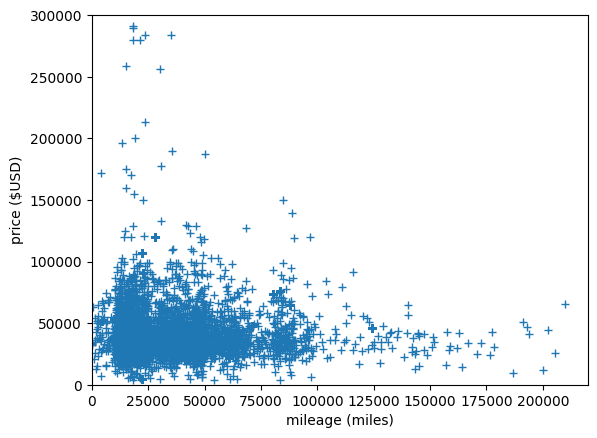

In [370]:
# A look at mileage vs. price plot
X = df['mileage'].tolist()
y = df['price'].tolist()
plt.plot(X, y, marker='+', linestyle='')
plt.xlabel('mileage (miles)')
plt.ylabel('price ($USD)')
plt.xlim(0, 220_000)
plt.ylim(0, 300_000)
# df.shape
# df.drop_duplicates()   duplicates should be removed later
# df.shape

In [371]:
# sample car input from user
make_in = "Honda"
model_in = "Pilot"
trim_in = "EX-L"
year_in = 2021
usedcert_in = 0

In [384]:
# Get sub-dataset of that car
user_input = " ".join([make_in, model_in, trim_in]).lower()
count = 0

X_train = np.empty((0,5)) # empty 2D array with 0 rows, 5 columns
y_train = np.array([])    # empty 1D array with 0 elements

for sample in df.values:
    if user_input in sample[0]:
        X_train = np.vstack((X_train, sample[1:6]))
        y_train = np.append(y_train, sample[6])

X_train.shape
y_train

array([36631., 37699., 37987., 38996., 37560., 36778., 24995., 41188.,
       33540., 41491., 34550., 35971., 36643., 39211., 34788., 35994.,
       33994., 34371., 39493., 36887., 34950., 39981., 38988., 38253.,
       35995., 36999., 34999., 40208., 42850., 36900., 35500., 24361.,
       40995., 34500., 36500., 37489., 33800., 33595., 34750., 36531.,
       41720., 34684., 41096., 32672.])

Text(0.5, 0.98, 'Feature(s) vs. Target')

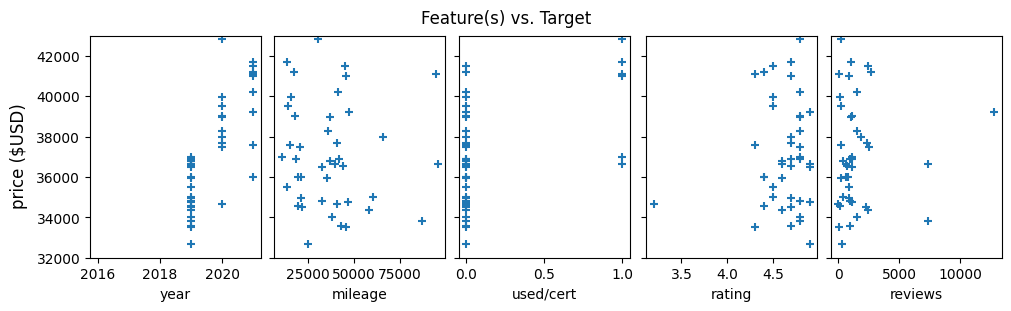

In [373]:
# Plot sub-dataset for sample input: Honda Pilot EX-L
# note that we ignore year_in and usedcert_in when obtaining sub-dataset
fig, axs = plt.subplots(1, 5, layout='constrained', sharey=True, figsize=(10,3))

for i in range(len(axs)):
    axs[i].scatter(X_train[:,i], y_train, marker='+')
    axs[i].set_xlabel(names[1+i])
    axs[i].set_ylim([32000, 43000])
fig.supylabel('price ($USD)')
fig.suptitle('Feature(s) vs. Target')

Notice the range of values vary greatly between each feature. Feature scaling is necessary.<br>
Decided to use **RobustScaler** to reduce outlier influence. Outliers are very common in this dataset.<br>
Info about Scale, Standardize, and Normalize with sklearn:
https://docs.google.com/spreadsheets/d/1woVi7wq13628HJ-tN6ApaRGVZ85OdmHsDBKLAf5ylaQ/edit?usp=sharing

[[ 0.          2.5007995   0.         -0.33333333 -0.23111845]
 [ 1.          0.22049631  0.          0.          1.14981428]
 [ 1.          1.26865331  0.          0.          0.79735865]
 [ 1.         -0.73915481  0.          0.33333333  0.16260834]
 [ 2.         -0.84373378  0.         -1.33333333 -0.59430458]]


Text(0.5, 0.98, 'Normal distribution of scaled features')

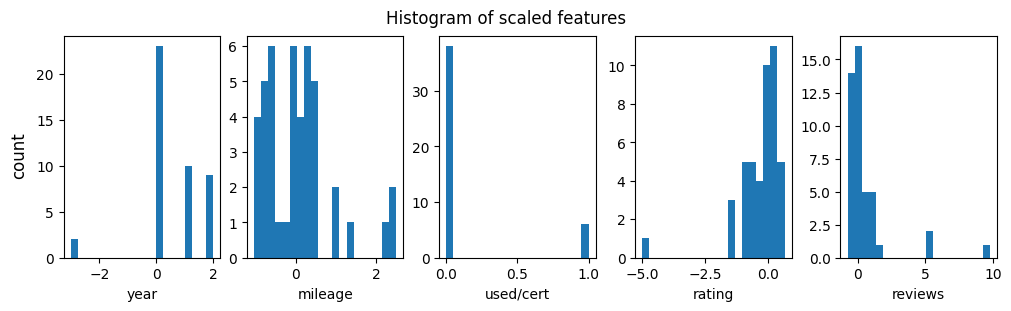

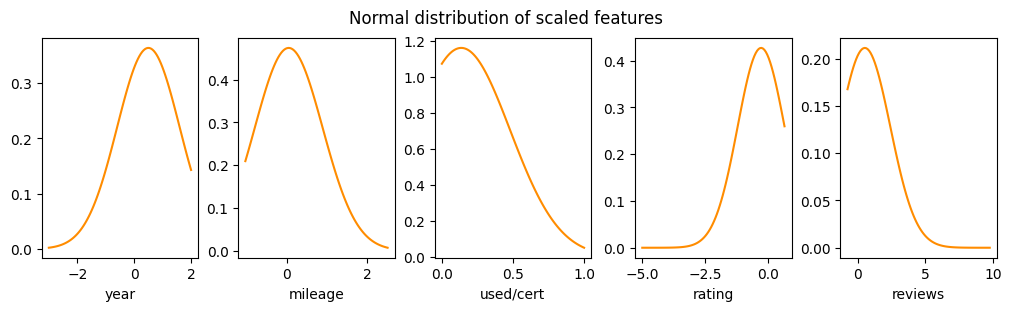

In [374]:
# Scale data
transformer = preprocessing.RobustScaler()
scaled_X_train = transformer.fit_transform(X_train)
print(scaled_X_train[0:5])

fig1, axs1 = plt.subplots(1, 5, layout='constrained', figsize=(10,3))
fig2, axs2 = plt.subplots(1, 5, layout='constrained', figsize=(10,3))

# Now let's visualize the scaled data
for i in range(len(axs)):
    
    # plot histogram
    axs1[i].hist(scaled_X_train[:,i], bins=20)
    axs1[i].set_xlabel(names[1+i])
    
    # plot normal distribution curve
    mu, std = norm.fit(scaled_X_train[:,i])
    x = np.linspace(min(scaled_X_train[:,i]), max(scaled_X_train[:,i]), 100)
    p = norm.pdf(x, mu, std)
    axs2[i].plot(x, p, color='darkorange')
    axs2[i].set_xlabel(names[1+i])
    
fig1.suptitle("Histogram of scaled features")
fig1.supylabel("count")
fig2.suptitle("Normal distribution of scaled features")

We can see that the features have been scaled, and the range of the scaled data is centered around zero and roughly +/- 2. This would allow gradient descent to converge much faster and improve the accuracy of our machine learning model.<br>
Furthermore, comparing the histograms and its corresponding normal distribution curve, we can see that outlier influence is greatly reduced.

In [390]:
# multivariate linear regression
model = linear_model.LinearRegression()
model.fit(scaled_X_train, y_train)
model.predict([[0, 0, 0, 0, 0]])
# TODO: finish predict function. We need to scale inputs as well
# check MLS lab for reference (In [18])

array([35160.51476489])

In [ ]:
def predict(m, input_arr):
    """
    Make prediction for inputs
    args: m (model)
    """
    

In [290]:
# # is the exact input name in the database at least 3 times?
# if y_train.shape[0] >= 3:
#     model = 